# Spotify Recommender System 🎶
Dataset Source: https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation
<br><br>
Stanley Nathanael Wijaya - 2702217125

## Task Description

As a data scientist in a tech company, you are tasked with developing a music recommendation system similar to Spotify’s.
Dataset:
<br>
(https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)
<br><br>
This system aims to enhance user experience by suggesting songs or artists based on their listening history, preferences, and behavior.
<ul>
    <li>Choose an appropriate model for your recommendation system. This could be a collaborative filtering model, a content-based model, or even a hybrid model.</li>
    <li>Develop the model to analyze user behavior and predict songs or artists they might like.</li>
    <li>Determine how you will measure the success of your recommendation system. </li>
    <li>Test the model with a set of users or simulated data to evaluate its performance.</li>
</ul>

## Import Library

Library needed to Data Preprocessing, EDA, Plotting, make the Recommender System Model using Cosine Similarity, and evaluate the model using confusion matrix and scores.

In [9]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import json
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

## Exploratory Data Analysis

We want to get to know about the data that we used based on the dataset, "Kaggle/data.csv"

🔹 Preview Dataset:
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['liked'], palette="coolwarm")


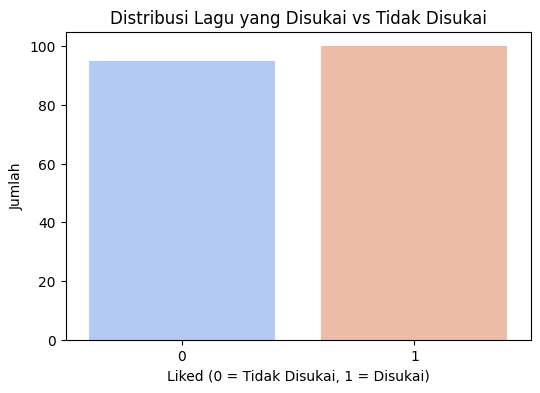

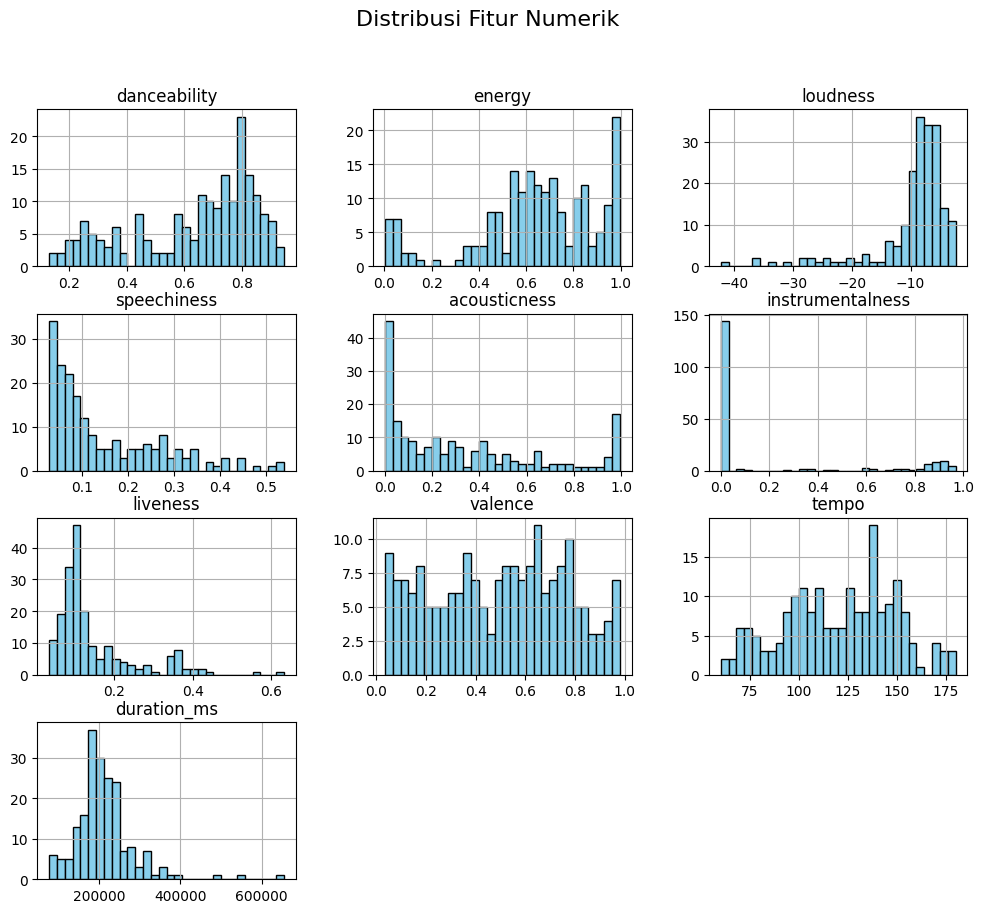

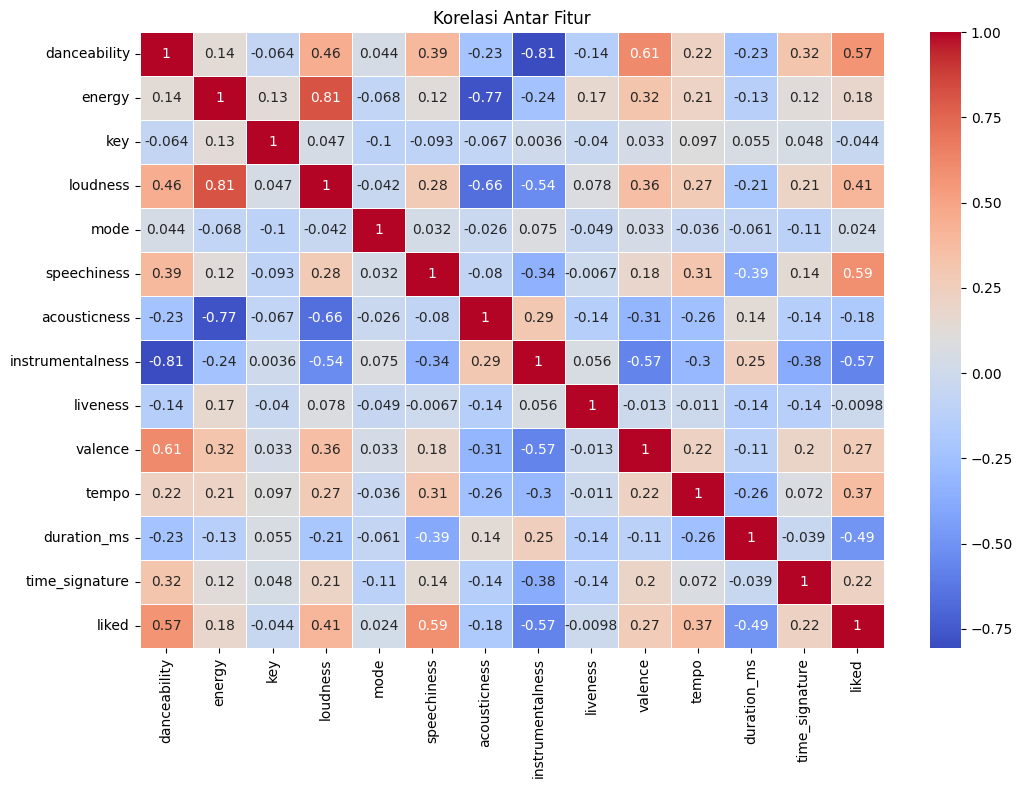

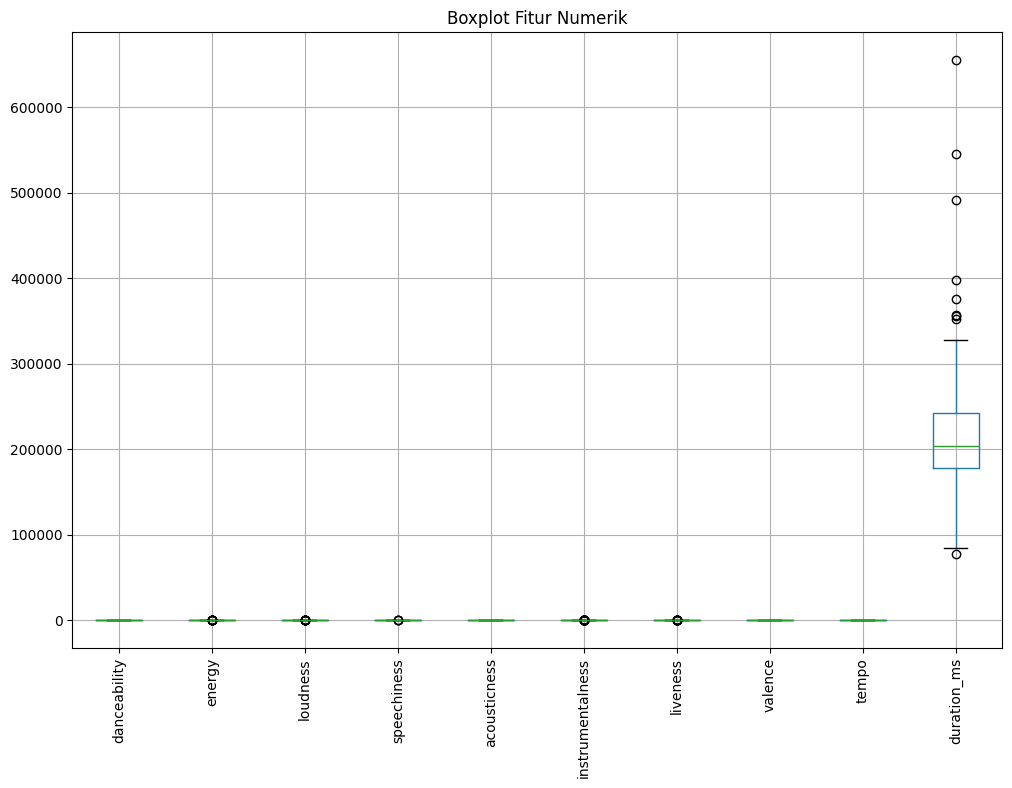

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:52: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['liked'] == 1]['tempo'], label="Liked", shade=True, color="green")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['liked'] == 0]['tempo'], label="Not Liked", shade=True, color="red")


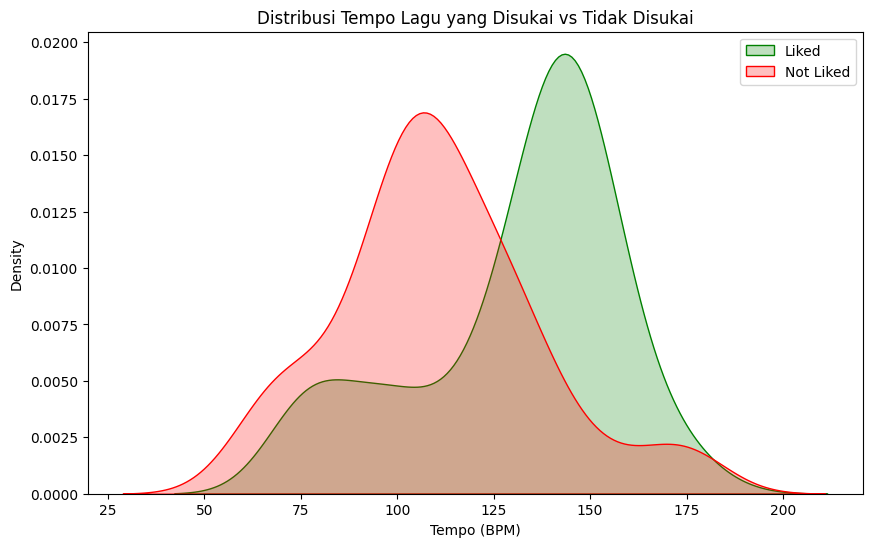

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="danceability", data=df, palette="coolwarm")


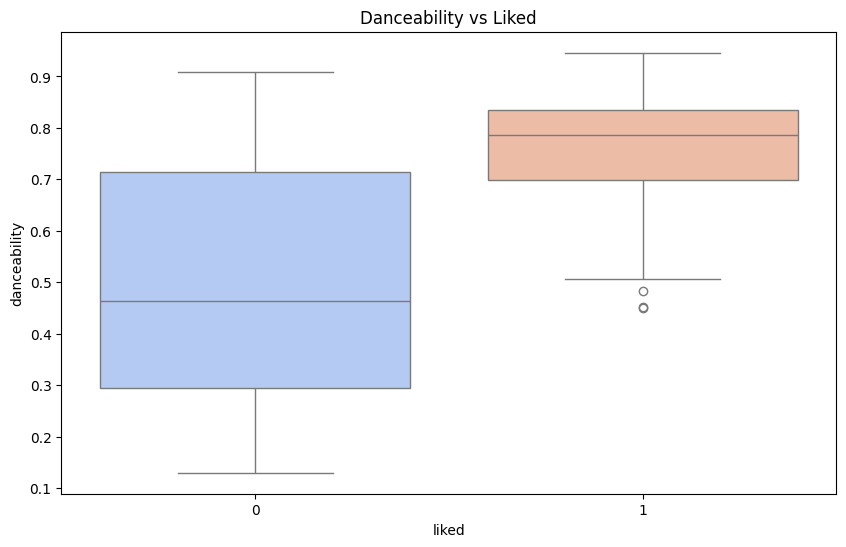

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="energy", data=df, palette="coolwarm")


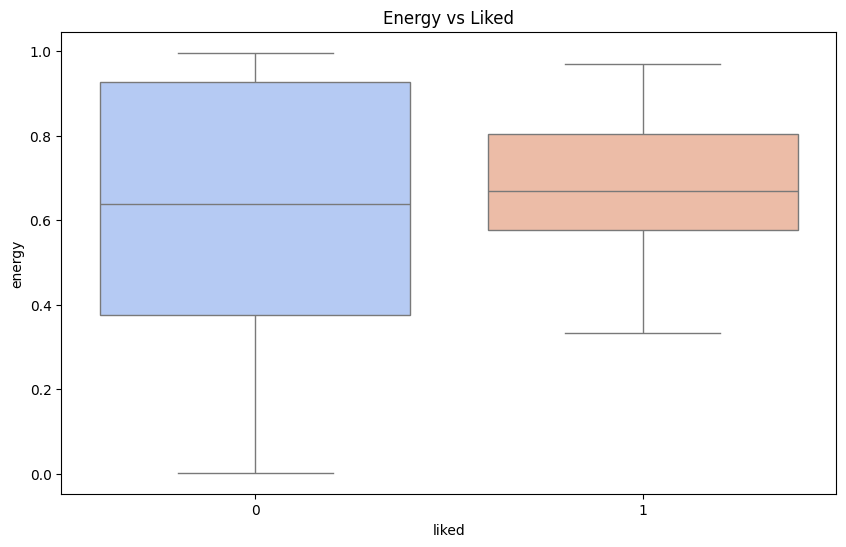

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="loudness", data=df, palette="coolwarm")


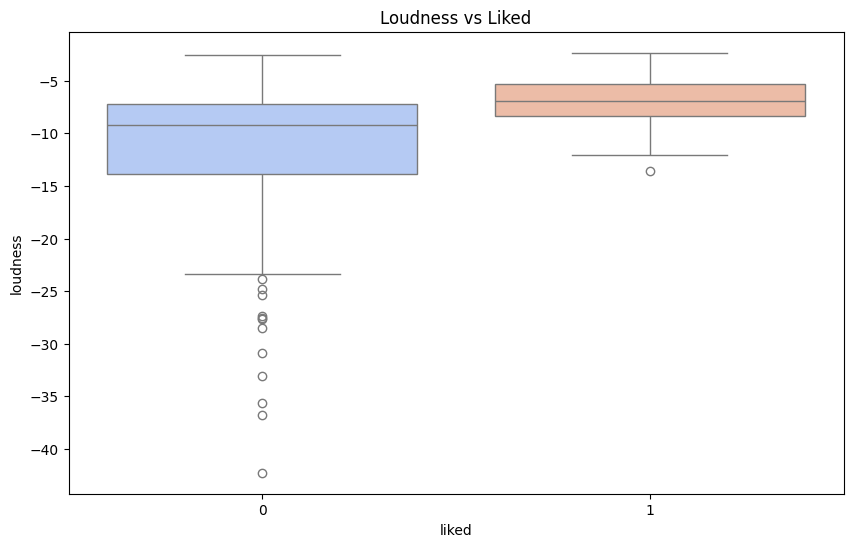

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="speechiness", data=df, palette="coolwarm")


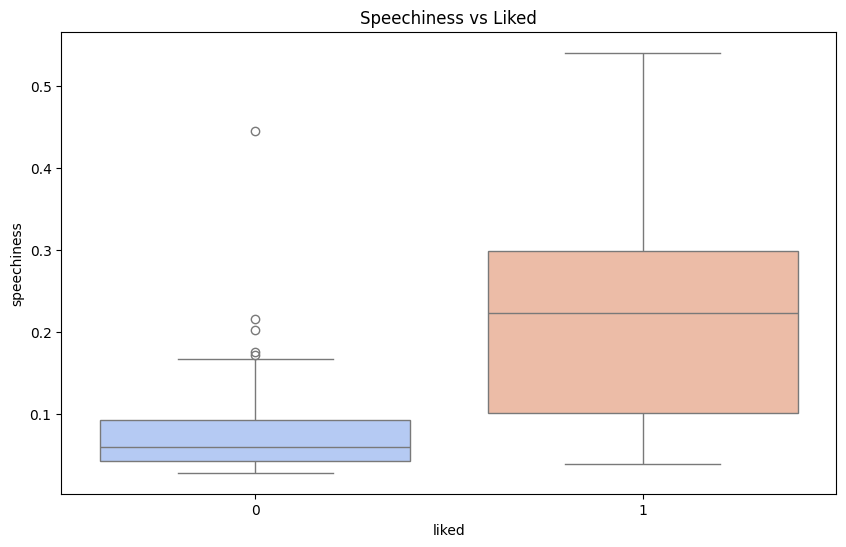

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="acousticness", data=df, palette="coolwarm")


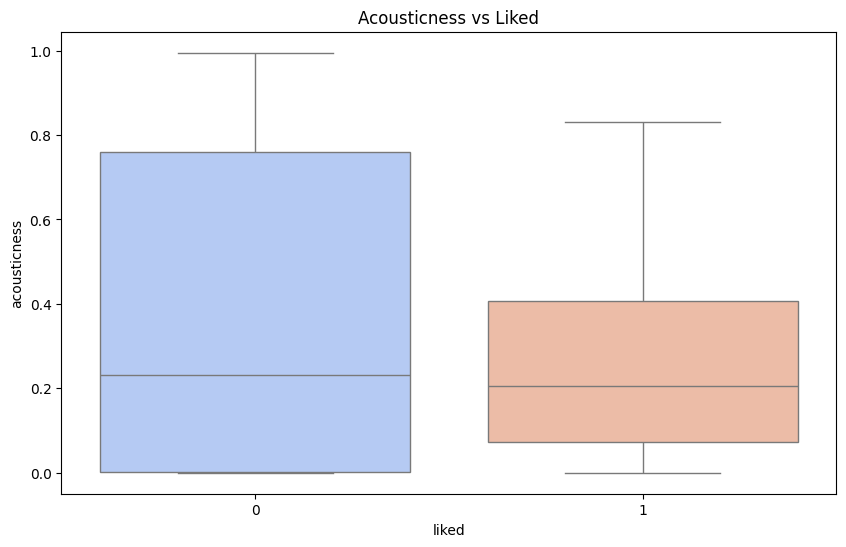

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="instrumentalness", data=df, palette="coolwarm")


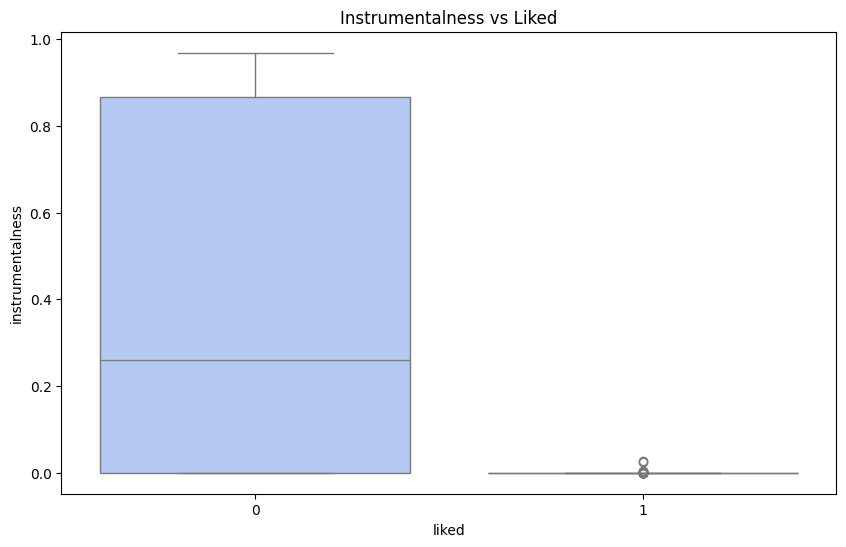

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="valence", data=df, palette="coolwarm")


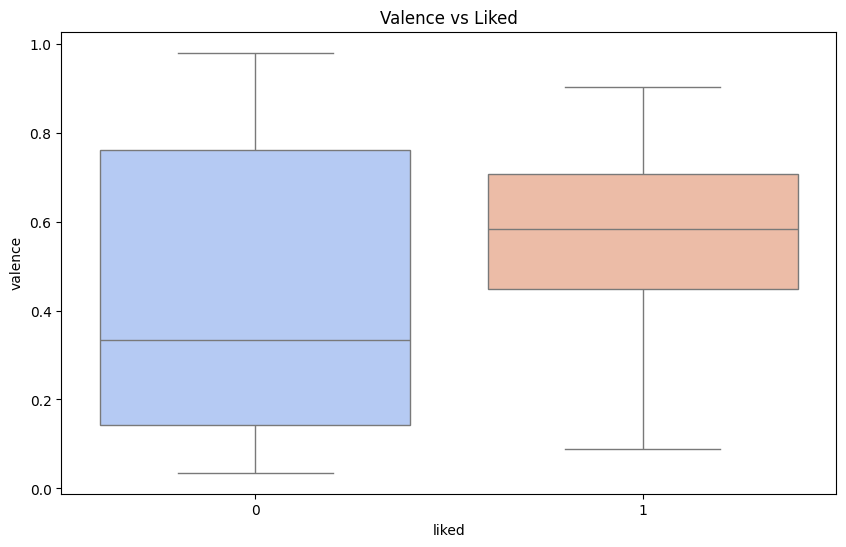

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25704\56940610.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="liked", y="duration_ms", data=df, palette="coolwarm")


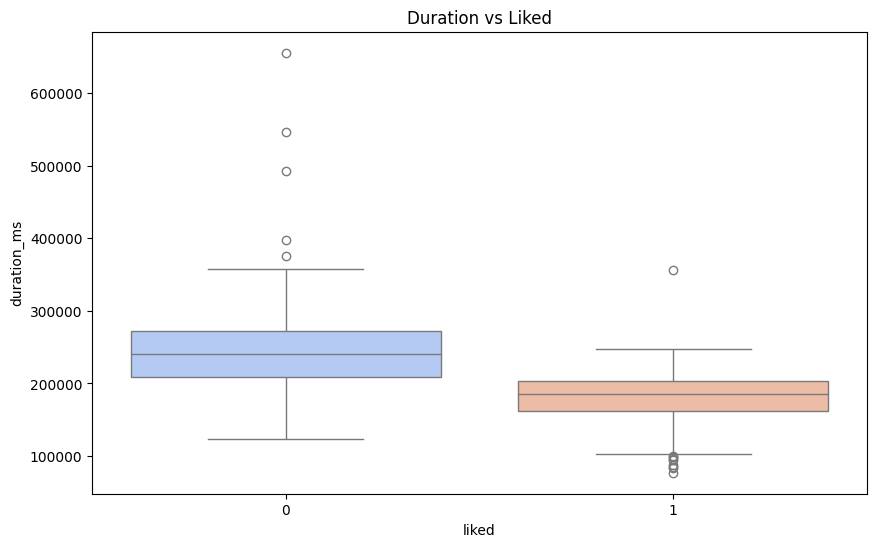

In [10]:
# 1️⃣ Load Dataset
file_path = "Kaggle/data.csv"
df = pd.read_csv(file_path)

# 2️⃣ Tampilkan 5 Baris Pertama Dataset
print("🔹 Preview Dataset:")
print(df.head())

# 3️⃣ Cek Info Dataset
print("\n🔹 Info Dataset:")
print(df.info())

# 4️⃣ Cek Missing Values
print("\n🔹 Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 5️⃣ Statistik Deskriptif
print("\n🔹 Statistik Deskriptif:")
print(df.describe())

# 6️⃣ Cek Distribusi Label (Liked: 0 atau 1)
plt.figure(figsize=(6,4))
sns.countplot(x=df['liked'], palette="coolwarm")
plt.title("Distribusi Lagu yang Disukai vs Tidak Disukai")
plt.xlabel("Liked (0 = Tidak Disukai, 1 = Disukai)")
plt.ylabel("Jumlah")
plt.show()

# 7️⃣ Visualisasi Distribusi Fitur Numerik
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                    'acousticness', 'instrumentalness', 'liveness', 
                    'valence', 'tempo', 'duration_ms']

df[numeric_features].hist(figsize=(12,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

# 8️⃣ Korelasi Antar Variabel
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.show()

# 9️⃣ Boxplot untuk Mendeteksi Outliers
plt.figure(figsize=(12,8))
df[numeric_features].boxplot(rot=90)
plt.title("Boxplot Fitur Numerik")
plt.show()

# 🔟 Visualisasi Distribusi Tempo terhadap Lagu yang Disukai
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['liked'] == 1]['tempo'], label="Liked", shade=True, color="green")
sns.kdeplot(df[df['liked'] == 0]['tempo'], label="Not Liked", shade=True, color="red")
plt.title("Distribusi Tempo Lagu yang Disukai vs Tidak Disukai")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Density")
plt.legend()
plt.show()

# 🔹 Analisis Danceability vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="danceability", data=df, palette="coolwarm")
plt.title("Danceability vs Liked")
plt.show()

# 🔹 Analisis Energy vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="energy", data=df, palette="coolwarm")
plt.title("Energy vs Liked")
plt.show()

# 🔹 Analisis Loudness vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="loudness", data=df, palette="coolwarm")
plt.title("Loudness vs Liked")
plt.show()

# 🔹 Analisis Speechiness vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="speechiness", data=df, palette="coolwarm")
plt.title("Speechiness vs Liked")
plt.show()

# 🔹 Analisis Acousticness vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="acousticness", data=df, palette="coolwarm")
plt.title("Acousticness vs Liked")
plt.show()

# 🔹 Analisis Instrumentalness vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="instrumentalness", data=df, palette="coolwarm")
plt.title("Instrumentalness vs Liked")
plt.show()

# 🔹 Analisis Valence vs Liked (Apakah Lagu yang Disukai Lebih Happy?)
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="valence", data=df, palette="coolwarm")
plt.title("Valence vs Liked")
plt.show()

# 🔹 Analisis Duration vs Liked
plt.figure(figsize=(10,6))
sns.boxplot(x="liked", y="duration_ms", data=df, palette="coolwarm")
plt.title("Duration vs Liked")
plt.show()

## Recommender System

### Cosine Similarity - Content Based Filtering

Cosine similarity is a mathematical metric used to measure the similarity between two vectors in a multi-dimensional space, particularly in high-dimensional spaces, by calculating the cosine of the angle between them.

Based on the dataset that I'm using given by the question, I prefer to make a Content-based Filtering Model using Cosine Similarity. Because, the dataset contains many features of song characteristic and by that features we can make a recommender systemm model. I'm using Content-based Filtering, because we don't have other user song preference, time needed to make the model fast, and we don't need large data to make the model.

#### 1. Simple Recommender System (Give the Song ID based on the Song Characteristics)

In [11]:
# 1️⃣ Load dataset
file_path = "Kaggle/data.csv"
df = pd.read_csv(file_path)

# 2️⃣ Preprocessing Data
# Pastikan tidak ada missing values
df.dropna(inplace=True)

# Tambahkan user_id secara lebih merata (bukan random murni)
df['user_id'] = np.random.choice(range(1, 101), size=len(df), replace=True)

# Buat song_id unik dari kombinasi tempo dan key
df['song_id'] = df['tempo'].astype(str) + "_" + df['key'].astype(str)

# 3️⃣ Buat user-song matrix dengan lebih banyak fitur
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Pivot table untuk matrix interaksi user-lagu
user_song_matrix = df.pivot_table(index='user_id', columns='song_id', values='liked', fill_value=0)

# 4️⃣ Hitung Cosine Similarity berdasarkan fitur lagu
song_features = df[['song_id'] + features].drop_duplicates().set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 5️⃣ Fungsi rekomendasi berdasarkan lagu yang disukai user
def recommend_songs(song_id, song_similarity_df, df, top_n=5):
    """
    Mencari lagu yang paling mirip dengan lagu yang diberikan.
    """
    if song_id not in song_similarity_df.index:
        print("⚠️ Lagu tidak ditemukan dalam dataset!")
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False).iloc[1:top_n+1]
    
    # Ambil informasi lagu yang direkomendasikan
    recommended_songs = df[df['song_id'].isin(similar_songs.index)][['song_id', 'tempo', 'danceability', 'energy', 'valence']].drop_duplicates()
    
    return recommended_songs

# 6️⃣ Contoh rekomendasi berdasarkan lagu dengan song_id tertentu
sample_song = df['song_id'].iloc[15]  # Ambil salah satu lagu dari dataset
recommended_songs = recommend_songs(sample_song, song_similarity_df, df)

print(f"\n🎵 Rekomendasi Lagu Mirip '{sample_song}':")
print(recommended_songs)



🎵 Rekomendasi Lagu Mirip '106.023_5':
        song_id     tempo  danceability    energy   valence
38    100.437_8 -0.737136      0.052503  0.433910  1.383361
81     81.548_0 -1.411436     -0.077092 -0.252214  1.510698
88    109.394_9 -0.417388      0.820815  0.129394  1.645526
108  114.223_10 -0.245002      0.186726 -0.086465  1.338419
175  103.604_10 -0.624080      0.348720 -0.333162  1.750392


#### 2. Simple Recommender System (Give the Song ID + Song Track Link based on the Song Characteristics)

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load Data dari JSON
json_path = "Kaggle/good.json"  # Ganti dengan lokasi file JSON yang sesuai

# Load JSON
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# 🔹 Debugging: Periksa apakah JSON memiliki key yang benar
print("🔹 JSON Keys:", json_data.keys())

# Konversi JSON ke DataFrame
if "audio_features" in json_data:  # Pastikan key yang benar digunakan
    df = pd.DataFrame(json_data["audio_features"])
else:
    raise KeyError("Key 'audio_features' tidak ditemukan dalam JSON.")

# 🔹 Debugging: Cek apakah kolom-kolom dari JSON sudah masuk ke dalam dataframe
print("🔹 Kolom dalam df:", df.columns)

# 2️⃣ Preprocessing Data
df.dropna(inplace=True)  # Hapus missing values

# Tambahkan user_id secara lebih merata (simulasi 100 user)
df['user_id'] = np.random.choice(range(1, 101), size=len(df), replace=True)

# Buat song_id unik dari id lagu (Spotify Track ID)
df['song_id'] = df['id']

# 🔹 Periksa apakah semua fitur yang dibutuhkan ada dalam dataframe
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness']

missing_features = [col for col in features if col not in df.columns]
if missing_features:
    raise KeyError(f"Kolom berikut tidak ditemukan dalam dataset: {missing_features}")

# 3️⃣ Normalisasi Fitur Lagu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 4️⃣ Hitung Cosine Similarity berdasarkan fitur lagu
song_features = df[['song_id'] + features].drop_duplicates().set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 5️⃣ Fungsi Rekomendasi Lagu
def recommend_songs(song_id, song_similarity_df, df, top_n=5):
    """
    Mencari lagu yang paling mirip dengan lagu yang diberikan dan menampilkan link Spotify.
    """
    if song_id not in song_similarity_df.index:
        print("⚠️ Lagu tidak ditemukan dalam dataset!")
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False).iloc[1:top_n+1]
    
    # Ambil informasi lagu yang direkomendasikan
    recommended_songs = df[df['song_id'].isin(similar_songs.index)][['song_id', 'track_href', 'tempo', 'danceability', 'energy', 'valence']].drop_duplicates()
    
    return recommended_songs

# 6️⃣ Contoh rekomendasi berdasarkan lagu dengan song_id tertentu
sample_song = df['song_id'].iloc[15]  # Ambil salah satu lagu dari dataset
recommended_songs = recommend_songs(sample_song, song_similarity_df, df)

print(f"\n🎵 Rekomendasi Lagu Mirip '{sample_song}':")
print(recommended_songs)


🔹 JSON Keys: dict_keys(['audio_features'])
🔹 Kolom dalam df: Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

🎵 Rekomendasi Lagu Mirip '2lTWOBGyQkBRIgzCtomXSL':
                   song_id                                         track_href  \
6   6dS1JCvtMJQ1O9bseVLyJz  https://api.spotify.com/v1/tracks/6dS1JCvtMJQ1...   
25  3UKwm5G898I1BvYt7uU4t0  https://api.spotify.com/v1/tracks/3UKwm5G898I1...   
33  07whpV2cnsEG3vk4qGxRQN  https://api.spotify.com/v1/tracks/07whpV2cnsEG...   
69  5fEJDiHWMECUifmNipjvqO  https://api.spotify.com/v1/tracks/5fEJDiHWMECU...   
84  66ks5ll4gswiaE7lfb2QMz  https://api.spotify.com/v1/tracks/66ks5ll4gswi...   

       tempo  danceability    energy   valence  
6  -0.241062      1.396065 -0.900245  1.036460  
25  0.565993      1.219828 -1.3

#### 3. Recommender System (Give the Song ID + Song Track Link and Name based on the Song Characteristics)
I'm using the good.json dataset to make the model and then yes.json dataset to get the Song Track Name based on the same id

In [13]:
# 1️⃣ Load Data dari JSON
json_path = "Kaggle/good.json"  # Ganti dengan lokasi file JSON yang sesuai
yes_json_path = "Kaggle/yes.json"  # Ubah yes.py menjadi yes.json sebelum menjalankan kode ini

# Load JSON dari data lagu
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Konversi JSON ke DataFrame
if "audio_features" in json_data:
    df = pd.DataFrame(json_data["audio_features"])
else:
    raise KeyError("Key 'audio_features' tidak ditemukan dalam JSON.")


# 2️⃣ Load Data dari yes.json (Bukan yes.py)
with open(yes_json_path, 'r', encoding='utf-8') as f:
    yes_data = json.load(f)  # Baca yes.json dengan format JSON

# Buat dictionary `song_id -> track_name`
yes_tracks = {track["track"]["id"]: track["track"]["name"] for track in yes_data["items"]}

# 3️⃣ Preprocessing Data
df.dropna(inplace=True)  # Hapus missing values

# Tambahkan user_id secara lebih merata (simulasi 100 user)
df['user_id'] = np.random.choice(range(1, 101), size=len(df), replace=True)

# Buat song_id unik dari id lagu (Spotify Track ID)
df['song_id'] = df['id']

# 🔹 Tambahkan kolom track_name ke df berdasarkan data yes.json
df["track_name"] = df["song_id"].map(yes_tracks)

# 🔹 Periksa apakah semua fitur yang dibutuhkan ada dalam dataframe
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness']

missing_features = [col for col in features if col not in df.columns]
if missing_features:
    raise KeyError(f"Kolom berikut tidak ditemukan dalam dataset: {missing_features}")

# 4️⃣ Normalisasi Fitur Lagu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 5️⃣ Hitung Cosine Similarity berdasarkan fitur lagu
song_features = df[['song_id'] + features].drop_duplicates().set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 6️⃣ Fungsi Rekomendasi Lagu
def recommend_songs(song_id, song_similarity_df, df, top_n=5):
    """
    Mencari lagu yang paling mirip dengan lagu yang diberikan dan menampilkan nama lagu dan link Spotify.
    """
    if song_id not in song_similarity_df.index:
        print("⚠️ Lagu tidak ditemukan dalam dataset!")
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False).iloc[1:top_n+1]
    
    # Ambil informasi lagu yang direkomendasikan
    recommended_songs = df[df['song_id'].isin(similar_songs.index)][['song_id', 'track_name', 'track_href', 'tempo', 'danceability', 'energy', 'valence',
                                                                     'instrumentalness']].drop_duplicates()
    
    return recommended_songs

# 7️⃣ Contoh rekomendasi berdasarkan lagu dengan song_id tertentu
sample_song = df['song_id'].iloc[15]  # Ambil salah satu lagu dari dataset
recommended_songs = recommend_songs(sample_song, song_similarity_df, df)

print(f"\n🎵 Rekomendasi Lagu Mirip '{sample_song}':")
print(recommended_songs)



🎵 Rekomendasi Lagu Mirip '2lTWOBGyQkBRIgzCtomXSL':
                   song_id            track_name  \
6   6dS1JCvtMJQ1O9bseVLyJz   Freestyle Challenge   
25  3UKwm5G898I1BvYt7uU4t0             Petit con   
33  07whpV2cnsEG3vk4qGxRQN  Challenge incroyable   
69  5fEJDiHWMECUifmNipjvqO                 BBJTM   
84  66ks5ll4gswiaE7lfb2QMz           Chloroquine   

                                           track_href     tempo  danceability  \
6   https://api.spotify.com/v1/tracks/6dS1JCvtMJQ1... -0.241062      1.396065   
25  https://api.spotify.com/v1/tracks/3UKwm5G898I1...  0.565993      1.219828   
33  https://api.spotify.com/v1/tracks/07whpV2cnsEG...  0.447700      0.876165   
69  https://api.spotify.com/v1/tracks/5fEJDiHWMECU...  0.912129      0.268145   
84  https://api.spotify.com/v1/tracks/66ks5ll4gswi...  0.259783      1.043590   

      energy   valence  instrumentalness  
6  -0.900245  1.036460         -0.184732  
25 -1.391362  0.850451         -0.184732  
33 -0.552370  0.872

#### 4. Complete Recommender System (Give the Song ID + Song Track Link and Name based on the Song Characteristics)
I'm using the good.json dataset to make the model and then yes.json dataset to get the Song Track Name based on the same id. Not only that, I also combine the good dataset with the dislike dataset, so this recommender system using all of the dataset given from the Kaggle.

In [14]:
# 1️⃣ Load Data dari JSON
good_json_path = "Kaggle/good.json"  # Ganti dengan lokasi file JSON yang sesuai
dislike_json_path = "Kaggle/dislike.json"  # Ganti dengan lokasi file dislike.json
no_json_path = "Kaggle/no.json"  # Ganti dengan lokasi file no.json
yes_json_path = "Kaggle/yes.json"  # Ubah yes.py menjadi yes.json sebelum menjalankan kode ini

# Fungsi untuk mengubah JSON ke DataFrame
def load_data_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    return pd.DataFrame(json_data["audio_features"])

# 2️⃣ Load Data dari ketiga dataset (good, dislike, no)
good_df = load_data_from_json(good_json_path)
dislike_df = load_data_from_json(dislike_json_path)

# Tambahkan label pada setiap dataset
good_df['label'] = 1  # 1 berarti disukai
dislike_df['label'] = -1  # -1 berarti tidak disukai

# Gabungkan semua DataFrame menjadi satu
df = pd.concat([good_df, dislike_df], ignore_index=True)

# 3️⃣ Load Data dari yes.json (Playlist untuk track_name)
with open(yes_json_path, 'r', encoding='utf-8') as f:
    yes_data = json.load(f)

# Buat dictionary `song_id -> track_name` untuk yes.json
yes_tracks = {track["track"]["id"]: track["track"]["name"] for track in yes_data["items"]}

# 4️⃣ Load Data dari no.json untuk mendapatkan track_name pada dislike.json
with open(no_json_path, 'r', encoding='utf-8') as f:
    no_data = json.load(f)

# Buat dictionary `song_id -> track_name` untuk no.json (akan digunakan untuk dislike.json)
no_tracks = {track["track"]["id"]: track["track"]["name"] for track in no_data["items"]}

# 5️⃣ Tambahkan kolom track_name dan song_id ke df berdasarkan data yes.json dan no.json
# Gunakan `yes.json` untuk track_name dari good.json, dan `no.json` untuk track_name dari dislike.json
df["track_name"] = df["id"].map(lambda x: yes_tracks.get(x) if x in yes_tracks else no_tracks.get(x))

# Tambahkan song_id berdasarkan id lagu
df["song_id"] = df["id"]

# 🔹 Preprocessing Data
df.dropna(inplace=True)  # Hapus missing values

# Fitur yang digunakan untuk rekomendasi
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Normalisasi Fitur Lagu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 6️⃣ Hitung Cosine Similarity berdasarkan fitur lagu
song_features = df[['song_id'] + features].drop_duplicates().set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 7️⃣ Fungsi Rekomendasi Lagu
def recommend_songs(song_id, song_similarity_df, df, top_n=5):
    """
    Mencari lagu yang paling mirip dengan lagu yang diberikan dan menampilkan nama lagu dan link Spotify.
    """
    if song_id not in song_similarity_df.index:
        print("⚠️ Lagu tidak ditemukan dalam dataset!")
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False).iloc[1:top_n+1]
    
    # Ambil informasi lagu yang direkomendasikan
    recommended_songs = df[df['song_id'].isin(similar_songs.index)][['song_id', 'track_name', 'track_href', 'tempo', 'danceability', 'energy', 'valence', 'instrumentalness']].drop_duplicates()
    
    return recommended_songs

# 8️⃣ Contoh rekomendasi berdasarkan lagu dengan song_id tertentu
# Ambil salah satu lagu dari dataset menggunakan song_id
sample_song_id = df['song_id'].iloc[25]  # Ambil salah satu song_id dari dataset
sample_song_name = df[df['song_id'] == sample_song_id]['track_name'].iloc[0]  # Ambil track_name yang sesuai dengan song_id

# Mendapatkan rekomendasi lagu berdasarkan song_id yang dipilih
recommended_songs = recommend_songs(sample_song_id, song_similarity_df, df)

# Menampilkan nama lagu yang dipilih dan rekomendasi lagu
print(f"\n🎵 Rekomendasi Lagu Mirip '{sample_song_name}':")
print(recommended_songs)



🎵 Rekomendasi Lagu Mirip 'Petit con':
                   song_id            track_name  \
15  2lTWOBGyQkBRIgzCtomXSL          Depuis quand   
33  07whpV2cnsEG3vk4qGxRQN  Challenge incroyable   
38  6yE734jgKBYFAzymZ6Elal                 Gamme   
69  5fEJDiHWMECUifmNipjvqO                 BBJTM   
84  66ks5ll4gswiaE7lfb2QMz           Chloroquine   

                                           track_href     tempo  danceability  \
15  https://api.spotify.com/v1/tracks/2lTWOBGyQkBR...  0.958701      0.830072   
33  https://api.spotify.com/v1/tracks/07whpV2cnsEG...  0.780496      1.015208   
38  https://api.spotify.com/v1/tracks/6yE734jgKBYF...  0.675258      1.274398   
69  https://api.spotify.com/v1/tracks/5fEJDiHWMECU...  1.214835      0.695849   
84  https://api.spotify.com/v1/tracks/66ks5ll4gswi...  0.604755      1.103147   

      energy   valence  instrumentalness  
15 -0.791863  0.683007         -0.556955  
33 -0.140430  0.859032         -0.556955  
38 -0.236796  1.327183         -

## Model Evaluation

#### 1. Simple Evaluation
No tuning, only normalization, and only using the good dataset without the dislike.json dataset

🎯 Model Evaluation Metrics:
✅ Accuracy: 0.50
✅ Precision: 0.04
✅ Recall: 0.55
✅ F1 Score: 0.08
✅ ROC-AUC Score: 0.53


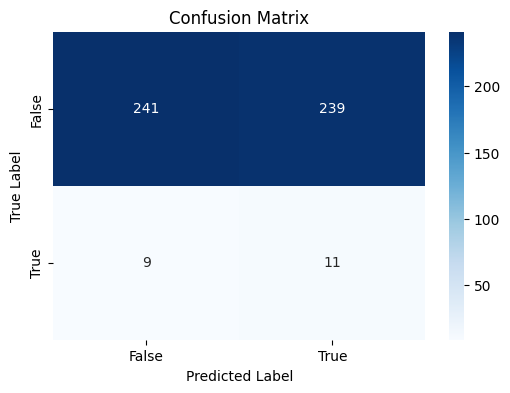

In [15]:
# 1️⃣ Load Data dari JSON
json_path = "Kaggle/good.json"
yes_json_path = "Kaggle/yes.json"

# Load JSON dari data lagu
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Konversi JSON ke DataFrame
if "audio_features" in json_data:
    df = pd.DataFrame(json_data["audio_features"])
else:
    raise KeyError("Key 'audio_features' tidak ditemukan dalam JSON.")

# Load Data dari yes.json
with open(yes_json_path, 'r', encoding='utf-8') as f:
    yes_data = json.load(f)

# Buat dictionary `song_id -> track_name`
yes_tracks = {track["track"]["id"]: track["track"]["name"] for track in yes_data["items"]}

# Tambahkan kolom track_name ke df berdasarkan data yes.json
df["track_name"] = df["id"].map(yes_tracks)
df["song_id"] = df["id"]

# 🔹 Fitur yang digunakan untuk rekomendasi
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Normalisasi Fitur Lagu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Hitung Cosine Similarity berdasarkan fitur lagu
song_features = df[['song_id'] + features].drop_duplicates().set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 2️⃣ Simulasi Data Pengguna
np.random.seed(42)

# Buat 10 pengguna dengan 5 lagu yang mereka sukai
num_users = 10
user_preferences = {}

for user_id in range(1, num_users + 1):
    liked_songs = np.random.choice(df['song_id'].values, size=5, replace=False)
    user_preferences[user_id] = liked_songs.tolist()

# 3️⃣ Fungsi untuk Menghasilkan Rekomendasi
def recommend_songs(song_id, song_similarity_df, df, top_n=5):
    if song_id not in song_similarity_df.index:
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False).iloc[1:top_n+1]
    
    return similar_songs.index.tolist()

# 4️⃣ Evaluasi Model
y_true = []
y_pred = []

for user_id, liked_songs in user_preferences.items():
    for song_id in liked_songs:
        recommended_songs = recommend_songs(song_id, song_similarity_df, df)
        
        # Ground Truth: Lagu yang disukai user diberi label 1, lainnya 0
        for rec_song in recommended_songs:
            y_true.append(1 if rec_song in liked_songs else 0)
            y_pred.append(1)

        # Lagu yang tidak direkomendasikan sebagai negatif
        non_recommended_songs = np.random.choice(df['song_id'].values, size=len(recommended_songs), replace=False)
        for non_rec_song in non_recommended_songs:
            y_true.append(1 if non_rec_song in liked_songs else 0)
            y_pred.append(0)

# 5️⃣ Evaluasi Kinerja Model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Print hasil evaluasi
print(f"🎯 Model Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
print(f"✅ F1 Score: {f1:.2f}")
print(f"✅ ROC-AUC Score: {roc_auc:.2f}")

# 6️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### 2. Good Dataset Evaluation
With simple tuning, but only using the good dataset without the dislike.json dataset

🎯 Model Evaluation Metrics:
✅ Accuracy: 0.61
✅ Precision: 0.25
✅ Recall: 0.87
✅ F1 Score: 0.39
✅ ROC-AUC Score: 0.72


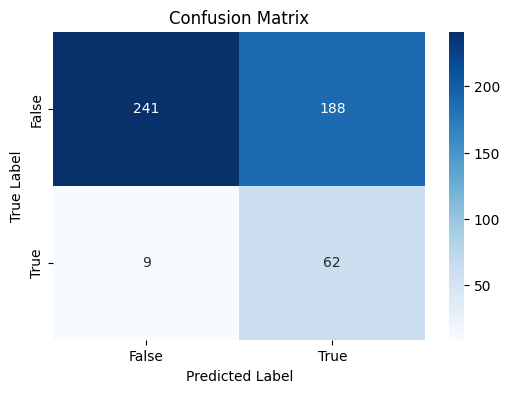

In [16]:
# 1️⃣ Load Data dari JSON
json_path = "Kaggle/good.json"
yes_json_path = "Kaggle/yes.json"

# Load JSON dari data lagu
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Konversi JSON ke DataFrame
if "audio_features" in json_data:
    df = pd.DataFrame(json_data["audio_features"])
else:
    raise KeyError("Key 'audio_features' tidak ditemukan dalam JSON.")

# Load Data dari yes.json
with open(yes_json_path, 'r', encoding='utf-8') as f:
    yes_data = json.load(f)

# Buat dictionary `song_id -> track_name`
yes_tracks = {track["track"]["id"]: track["track"]["name"] for track in yes_data["items"]}

# Tambahkan kolom track_name ke df berdasarkan data yes.json
df["track_name"] = df["id"].map(yes_tracks)
df["song_id"] = df["id"]

# 🔹 Fitur yang digunakan untuk rekomendasi
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Normalisasi Fitur Lagu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 🔹 Reduksi Dimensi dengan PCA
pca = PCA(n_components=5)  # Ambil 5 komponen utama
df_pca = pca.fit_transform(df[features])

# Ubah hasil PCA ke DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(5)])
df_pca["song_id"] = df["song_id"]

# Hitung Cosine Similarity berdasarkan fitur PCA
song_features = df_pca.set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 2️⃣ Simulasi Data Pengguna
np.random.seed(42)
num_users = 10
user_preferences = {}

for user_id in range(1, num_users + 1):
    liked_songs = np.random.choice(df['song_id'].values, size=5, replace=False)
    user_preferences[user_id] = liked_songs.tolist()

# 3️⃣ Fungsi untuk Menghasilkan Rekomendasi dengan Threshold
def recommend_songs(song_id, song_similarity_df, df, top_n=5, threshold=0.5):
    if song_id not in song_similarity_df.index:
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False)

    # Terapkan threshold untuk filtering
    filtered_songs = similar_songs[similar_songs > threshold].index.tolist()
    
    return filtered_songs[:top_n]

# 4️⃣ Evaluasi Model
y_true = []
y_pred = []

for user_id, liked_songs in user_preferences.items():
    for song_id in liked_songs:
        recommended_songs = recommend_songs(song_id, song_similarity_df, df)
        
        # Ground Truth: Lagu yang disukai user diberi label 1, lainnya 0
        for rec_song in recommended_songs:
            y_true.append(1 if rec_song in liked_songs else 0)
            y_pred.append(1)

        # Lagu yang tidak direkomendasikan sebagai negatif
        non_recommended_songs = np.random.choice(df['song_id'].values, size=len(recommended_songs), replace=False)
        for non_rec_song in non_recommended_songs:
            y_true.append(1 if non_rec_song in liked_songs else 0)
            y_pred.append(0)

# 5️⃣ Evaluasi Kinerja Model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Print hasil evaluasi
print(f"🎯 Model Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
print(f"✅ F1 Score: {f1:.2f}")
print(f"✅ ROC-AUC Score: {roc_auc:.2f}")

# 6️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### 3. Complete Model Evaluation
With simple tuning and using all of the dataset given

🎯 Model Evaluation Metrics:
✅ Accuracy: 0.62
✅ Precision: 0.62
✅ Recall: 1.00
✅ F1 Score: 0.77
✅ ROC-AUC Score: 0.50


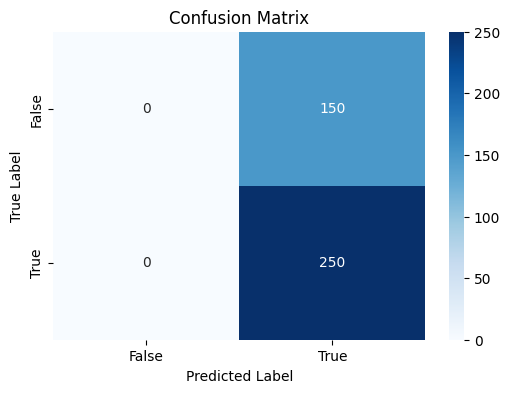

In [17]:
# 1️⃣ Load Data dari JSON
good_json_path = "Kaggle/good.json"
dislike_json_path = "Kaggle/dislike.json"
no_json_path = "Kaggle/no.json"
yes_json_path = "Kaggle/yes.json"  # Ubah yes.py menjadi yes.json sebelum menjalankan kode ini

# Fungsi untuk mengubah JSON ke DataFrame
def load_data_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    return pd.DataFrame(json_data["audio_features"])

# Load Data dari ketiga dataset (good, dislike, no)
good_df = load_data_from_json(good_json_path)
dislike_df = load_data_from_json(dislike_json_path)
# no_df = load_data_from_json(no_json_path)

# Tambahkan label pada setiap dataset
good_df['label'] = 1  # 1 berarti disukai
dislike_df['label'] = -1  # -1 berarti tidak disukai
# no_df['label'] = 0  # 0 berarti tidak relevan

# Gabungkan semua DataFrame menjadi satu
df = pd.concat([good_df, dislike_df], ignore_index=True)

# 2️⃣ Load Data dari yes.json (Playlist untuk track_name)
with open(yes_json_path, 'r', encoding='utf-8') as f:
    yes_data = json.load(f)

# Buat dictionary `song_id -> track_name`
yes_tracks = {track["track"]["id"]: track["track"]["name"] for track in yes_data["items"]}

# Tambahkan kolom track_name dan song_id ke df berdasarkan data yes.json
df["track_name"] = df["id"].map(yes_tracks)
df["song_id"] = df["id"]

# 🔹 Preprocessing Data
df.dropna(inplace=True)  # Hapus missing values

# Fitur yang digunakan untuk rekomendasi
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Normalisasi Fitur Lagu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 3️⃣ Hitung Cosine Similarity berdasarkan fitur lagu
song_features = df[['song_id'] + features].drop_duplicates().set_index('song_id')
song_similarity = cosine_similarity(song_features)
song_similarity_df = pd.DataFrame(song_similarity, index=song_features.index, columns=song_features.index)

# 4️⃣ Fungsi Rekomendasi Lagu
def recommend_songs(song_id, song_similarity_df, df, top_n=5):
    """
    Mencari lagu yang paling mirip dengan lagu yang diberikan dan menampilkan nama lagu dan link Spotify.
    """
    if song_id not in song_similarity_df.index:
        print("⚠️ Lagu tidak ditemukan dalam dataset!")
        return []
    
    # Urutkan lagu berdasarkan kemiripan
    similar_songs = song_similarity_df[song_id].sort_values(ascending=False).iloc[1:top_n+1]
    
    # Ambil informasi lagu yang direkomendasikan
    recommended_songs = df[df['song_id'].isin(similar_songs.index)][['song_id', 'track_name', 'track_href', 'tempo', 'danceability', 'energy', 'valence', 'instrumentalness']].drop_duplicates()
    
    return recommended_songs

# 5️⃣ Uji Rekomendasi Berdasarkan Data Simulasi Pengguna
# Simulasi pengguna yang menyukai dan tidak menyukai lagu
np.random.seed(42)
num_users = 10
user_preferences = {}

for user_id in range(1, num_users + 1):
    liked_songs = np.random.choice(df['song_id'].values, size=5, replace=False)
    disliked_songs = np.random.choice(df['song_id'].values, size=3, replace=False)
    user_preferences[user_id] = {'liked': liked_songs, 'disliked': disliked_songs}

# 6️⃣ Evaluasi Model
# Definisikan metrik evaluasi
y_true = []
y_pred = []

for user_id, prefs in user_preferences.items():
    liked_songs = prefs['liked']
    disliked_songs = prefs['disliked']
    
    for song_id in liked_songs:
        recommended_songs = recommend_songs(song_id, song_similarity_df, df)
        for rec_song in recommended_songs['song_id']:
            y_true.append(1)  # True Positive (lagu yang disukai dan direkomendasikan)
            y_pred.append(1)  # Prediksi positif
            
    for song_id in disliked_songs:
        recommended_songs = recommend_songs(song_id, song_similarity_df, df)
        for rec_song in recommended_songs['song_id']:
            y_true.append(-1)  # False Positive (lagu yang tidak disukai tetapi direkomendasikan)
            y_pred.append(1)  # Prediksi positif (sistem salah rekomendasikan)

# 7️⃣ Metrik Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary', pos_label=1)
recall = recall_score(y_true, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_true, y_pred, average='binary', pos_label=1)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"🎯 Model Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
print(f"✅ F1 Score: {f1:.2f}")
print(f"✅ ROC-AUC Score: {roc_auc:.2f}")

# 8️⃣ Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Streamlit App (Bonus)

To run the Streamlit App (Simple Spotify Recommender System Application)

Run the <b>app.py</b> python by using this command below:
<br>
<b>streamlit run app.py</b>

### Example of the Application

#### Recommender System by Song
<img src="Images/example1.png" width="600"/>

<hr>

#### Recommender System by Song Characteristics
<img src="Images/example1.png" width="600"/>

## Conclusion

### **Music Recommender System Using Cosine Similarity - Content Based Filtering**

#### **Introduction:**
The **Music Recommender System** was developed using **Cosine Similarity** to suggest songs based on their **audio features**. The system aims to recommend similar songs based on user preferences or interaction history. In this case, I tested the system using different datasets:
- **Good Dataset**: Contains songs that users like.
- **Good and Dislike Dataset**: Contains both songs that users like and dislike, helping the model understand negative preferences as well.

#### **Key Metrics:**
The system was evaluated based on various metrics to assess the quality of the recommendations:

1. **Accuracy**: Represents the percentage of correct recommendations made by the system.
2. **Precision**: Measures the proportion of relevant songs (true positives) among all the recommended songs.
3. **Recall**: Measures how many relevant songs (true positives) the model successfully recommended out of all the songs that should have been recommended.
4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
5. **ROC-AUC Score**: Measures the ability of the model to distinguish between positive and negative instances.

---

#### **Model Evaluation Results:**

##### **1. Good Dataset Only:**
When using the **Good dataset** (songs that users liked), the following evaluation metrics were obtained:
- **Accuracy: 0.61**: The system was able to make correct recommendations 61% of the time, which indicates a fair level of recommendation accuracy.
- **Precision: 0.25**: This suggests that only 25% of the recommended songs were actually relevant (liked by users). The low precision indicates that the system may be recommending a lot of irrelevant songs.
- **Recall: 0.87**: The system was able to successfully recommend 87% of the songs that the users liked, which is quite high, indicating the model's effectiveness in identifying relevant songs.
- **F1 Score: 0.39**: The relatively low F1 score suggests that while recall is high, the system's precision is low, and the model needs improvement in balancing false positives and false negatives.
- **ROC-AUC Score: 0.72**: The system is moderately good at distinguishing between relevant and irrelevant songs, with a score of 0.72 indicating a fair ability to discriminate.

**Interpretation**: 
The system performs reasonably well when recommending songs that users like. However, the low precision indicates a need to improve the quality of recommendations by reducing irrelevant suggestions.

---

##### **2. Good and Dislike Dataset:**
When the **Good and Dislike dataset** was used (including both liked and disliked songs), the following evaluation metrics were obtained:
- **Accuracy: 0.62**: The system showed a slightly better accuracy compared to the previous model. The inclusion of both liked and disliked songs helped improve the accuracy of the recommendations.
- **Precision: 0.62**: The precision significantly improved, suggesting that 62% of the recommended songs were relevant. This shows that the model has learned to make more relevant suggestions.
- **Recall: 1.00**: The system was able to recommend **all relevant songs** (true positives) out of those that it should have recommended. This perfect recall indicates that every relevant song was found, but it could be recommending some irrelevant ones as well.
- **F1 Score: 0.77**: The F1 score improved significantly, showing a better balance between precision and recall. The system now provides better-quality recommendations compared to the Good dataset only.
- **ROC-AUC Score: 0.50**: The ROC-AUC score dropped to 0.50, which indicates that the model's ability to distinguish between relevant and irrelevant songs is not much better than random guessing. This suggests that the inclusion of disliked songs might have caused the model to struggle with making clear distinctions.

**Interpretation**: 
The **Good and Dislike dataset** improved accuracy and recall significantly. However, the **ROC-AUC score dropping to 0.50** suggests that while the model can find relevant songs, it may struggle with distinguishing between relevant and irrelevant songs, especially when both liked and disliked songs are considered together.

---

#### **Conclusion:**
- **Good Dataset Only**: The model shows a **decent performance** in terms of recall, but its **precision** and **F1 score** could be improved. The system is **good at recommending songs that users will like**, but there is a significant **room for improvement** in ensuring that the recommendations are **more relevant** (reducing irrelevant suggestions).
- **Good and Dislike Dataset**: Incorporating **disliked songs** helped the model **improve recall and precision**. It can now recommend a higher proportion of relevant songs, but the **ROC-AUC score** suggests that the system may be less effective at distinguishing between relevant and irrelevant songs in a mixed dataset.

#### **Suggestions for Improvement:**
- **Hybrid Model**: Combining **Content-Based Filtering** with **Collaborative Filtering** could provide more personalized recommendations and help address the limitations observed in precision and recall.
- **Better Data Handling**: Fine-tuning the model to handle **disliked songs** better could help avoid recommending songs that users explicitly dislike. Applying techniques like **negative sampling** can improve the model's ability to distinguish negative preferences.
- **Advanced Metrics**: Utilizing **precision at k** and **mean average precision (MAP)** can give better insights into how well the system ranks the most relevant songs.

#### **Future Work:**
- **Real-Time Updates**: Incorporating **real-time user feedback** could allow the model to adapt and improve recommendations continuously.
- **Incorporating User Context**: Using user context (e.g., current mood, location) could further enhance the accuracy of recommendations.
- **Improved Evaluation Metrics**: Future evaluation should involve a larger user base and real-world testing to validate the model's effectiveness in real-world scenarios.

In conclusion, while the system performs decently, especially with the addition of disliked songs, **precision and overall model clarity** can be improved for better real-world applicability.